# KMeans
- 一种无监督的聚类算法，k中心聚类

In [1]:
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans
import numpy as np
import matplotlib.pyplot as plt

In [2]:
obs = np.array([
    [1, 5],
    [3, 7],
    [5, 10],
    [7, 7],
    [10, 5],
    [7, 3],
    [5, 1],
    [3, 3]
])
obs[:, 1] *= 10

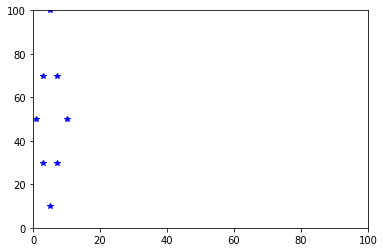

In [3]:
max_val = obs.max()
plt.xlim(0, max_val)
plt.ylim(0, max_val)
plt.plot(obs[:, 0], obs[:, 1], "b*")

### 白化是为了去特征维度之间的相关性。有PCA白化、ZCA白化。相关性衡量方式有协方差。但是在这里仅仅是除以标准差做白化，相当于是标准化。去除维度之间的量纲影响
* 比如PCA和ZCA白化，是为了使得协方差矩阵为单位矩阵，即特征之间不相关

In [4]:
norm_obs = obs / obs.std(0)
norm_obs

array([[0.37504578, 1.87522892],
       [1.12513735, 2.62532049],
       [1.87522892, 3.75045785],
       [2.62532049, 2.62532049],
       [3.75045785, 1.87522892],
       [2.62532049, 1.12513735],
       [1.87522892, 0.37504578],
       [1.12513735, 1.12513735]])

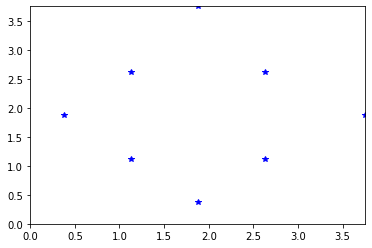

In [5]:
max_val = norm_obs.max()
plt.xlim(0, max_val)
plt.ylim(0, max_val)
plt.plot(norm_obs[:, 0], norm_obs[:, 1], "b*")

### 去除维度单位差异前，原始数据的距离计算，y的贡献太大，盖过了x的贡献。造成03距离>04距离

In [6]:
np.sqrt(np.sum((obs[0] - obs[3]) ** 2)), np.sqrt(np.sum((obs[0] - obs[4]) ** 2))

(20.8806130178211, 9.0)

### 去除维度单位差异后，计算距离，x和y的贡献相当，03距离<04距离

In [7]:
np.sqrt(np.sum((norm_obs[0] - norm_obs[3]) ** 2)), np.sqrt(np.sum((norm_obs[0] - norm_obs[4]) ** 2))

(2.3719978133155237, 3.375412062757167)

In [8]:
whiten(obs) 

array([[0.37504578, 1.87522892],
       [1.12513735, 2.62532049],
       [1.87522892, 3.75045785],
       [2.62532049, 2.62532049],
       [3.75045785, 1.87522892],
       [2.62532049, 1.12513735],
       [1.87522892, 0.37504578],
       [1.12513735, 1.12513735]])

# kmeans(obs, k_or_guess, iter=20, thresh=1e-05, check_finite=True)
* obs，样本，格式是 M x N，每一行都是一个观察向量。每一列都是观察的特征值。调用kmean前请对数据进行白化whiten处理，去掉量纲影响
* k_or_guess，指定为k，或者指定为M x N个质心，称之为码本(codebook)，如果指定为k整数，那么codebook就会随机从obs中选择k个作为初始质心
* iter，运行kmeans的次数，返回失真度最低时的码本。如果初始质心是用数组指定的，则忽略此参数。此参数不表示k-means算法的迭代次数
* thresh，如果前后2次迭代的失真度变化小于等于阈值，就终止kmeans运算返回结果
* check_finite，是否检查数据，如果检查会影响速度，但是不检查（如果数据输入为nan或者inf时会造成错误，比如长期迭代不返回等问题）

#### kmeans这里，是为了避免计算样本间距离时，不同数据维度的基数不同（也可以说是单位不同），造成距离匹配不能很好的表示样本距离。造成中心评估失效

In [9]:
import matplotlib.pyplot as plt

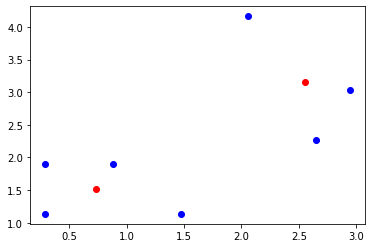

In [10]:
obs = np.array([
    [1, 5],
    [5, 3],
    [1, 3],
    [3, 5],
    [10, 8],
    [7, 11],
    [9, 6]
])
whitened = whiten(obs)
codebook, distortion = kmeans(whitened, 2, iter=20)
plt.scatter(whitened[:, 0], whitened[:, 1], c="b")
plt.scatter(codebook[:, 0], codebook[:, 1], c='r')
plt.show()

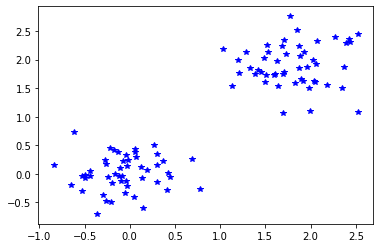

In [11]:
data = np.random.randn(100, 2)
data[:50] += 5.0
data = data / data.std(0)
plt.plot(data[:, 0], data[:, 1], "b*")

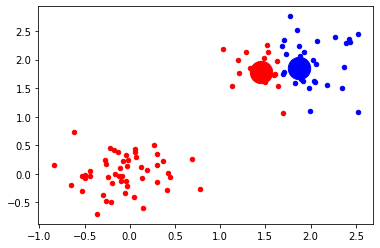

In [12]:
k = 2
#center_index = np.random.choice(np.arange(len(data)), k)
center_index = [0, 1]
center = data[center_index]

def dispatch(data, center):
    data = data[:, None]  # N x 1 x 2
    center = center[None] # 1 x k x 2
    
    # N x k
    distance = ((data - center) ** 2).sum(axis=2)
    return distance.argmin(axis=1)

#def dist(data, center):
data_class = dispatch(data, center)
c0 = data_class == 0
c1 = data_class == 1
plt.scatter(data[c0, 0], data[c0, 1], c="b", s=20)
plt.scatter(data[c1, 0], data[c1, 1], c="r", s=20)
plt.scatter(center[0, 0], center[0, 1], c="b", s=500)
plt.scatter(center[1, 0], center[1, 1], c="r", s=500)

diff: 2.84897
diff: 0.47199
diff: 0.00000


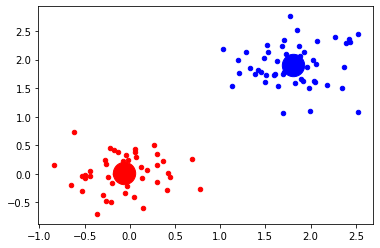

In [13]:
finished = False
threshold_center_change = 0.01

while not finished:
    data_class = dispatch(data, center)
    center_0 = data[data_class==0].mean(axis=0, keepdims=True)
    center_1 = data[data_class==1].mean(axis=0, keepdims=True)
    new_center = np.vstack((center_0, center_1))
    
    diff = ((new_center - center) ** 2).sum()
    finished = diff < threshold_center_change
    center = new_center
    print(f"diff: {diff:.5f}")

data_class = dispatch(data, center)
c0 = data_class == 0
c1 = data_class == 1
plt.scatter(data[c0, 0], data[c0, 1], c="b", s=20)
plt.scatter(data[c1, 0], data[c1, 1], c="r", s=20)
plt.scatter(center[0, 0], center[0, 1], c="b", s=500)
plt.scatter(center[1, 0], center[1, 1], c="r", s=500)